# 5주차: 자신의 데이터를 활용한 지도학습 및 비지도학습 모델 구현
---
## 보고서: 한문고전번역 모델 구현

### 1. **소개**

이 보고서는 한문 고전 문서를 번역하기 위한 모델 구현 과정을 설명합니다. 본 과제에서는 문서 전처리와 `seq2seq` 모델을 사용한 지도학습 기반 번역 모델을 개발하였으며, 이후 비지도 학습 기법을 활용하여 모델 개선을 시도했습니다. 비지도 학습의 주요 내용으로는 TF-IDF 벡터화와 클러스터링을 포함하고 있습니다.

### 2. **데이터 전처리**

#### 2.1 데이터 로딩 및 전처리

- **데이터 로딩**: 데이터셋을 로드한 후, 한문 고전 문서들의 텍스트 데이터를 학습에 사용할 수 있게 변환하였습니다.
- **변환 과정**:
  - 이미 이전 차시에서 결측치 처리와 토큰화를 진행한 후, 저장한 데이터를 로드하였기에 별도의 전처리 과정은 거치지 않고, 토큰화된 단어 리스트를 하나의 문장으로 변환해주었습니다.

#### 2.2 `seq2seq` 모델 개발

- **모델 설계**: 입력 시퀀스를 받아 출력 시퀀스를 생성하는 `seq2seq` 모델을 설계하였습니다. 이 모델은 인코더와 디코더로 구성되며, 문장 단위의 번역을 목표로 하였습니다.
우선, 데이터를 학습 데이터와 테스트 데이터로 분리하였습니다(9:1). 학습 시간의 문제와 문법적 난이도를 고려하여 길이가 5이하인 짧은 문장들만 추려 학습을 진행하였습니다.
- **모델 학습**: 준비된 데이터로 모델을 학습시켰습니다. 학습 과정에서 하이퍼파라미터 조정과 모델 튜닝을 수행하였으나, 결과적으로 모델의 번역 정확도가 기대에 미치지 못하였습니다. 아래는 모델이 번역해준 한 문장 예시입니다.
```
> 庚 寅 氷
= 얼음 이 얼었다
< 가 큰 청나라 <EOS>
```

### 3. **모델 평가**

모델의 성능을 평가하기 위해, 어텐션 메커니즘을 사용한 시각화를 통해 입력 문장의 각 단어에 대한 모델의 주의 집중도를 측정하였습니다. 어텐션 시각화 결과 대부분의 값이 0.2 이하로 나타나, 모델이 입력 문장의 특정 단어에 충분한 주의를 기울이지 못했음을 확인할 수 있었습니다.

해당 부분에 대해서는 학습 과정의 문제보다는 한문이라는 언어의 특성 때문이라고 생각되어, 최종논문의 실패 요인 분석으로 자세하게 다룰 예정입니다.

### 4. **비지도 학습 적용**

#### 4.1 TF-IDF 벡터화

- **TF-IDF 변환**: 전처리된 문서들을 TF-IDF 벡터로 변환하였습니다. TF-IDF 벡터화는 각 문서의 중요 단어를 수치적으로 표현하여, 문서 간의 유사성을 분석할 수 있게 합니다.
- **행렬 생성**: TF-IDF 행렬의 크기는 (1022162, 346378)으로, 매우 희소한 행렬이 생성되었습니다.

#### 4.2 클러스터링

- **클러스터링 기법**: TF-IDF 벡터를 기반으로 K-means 클러스터링을 수행하여 문서들을 여러 개의 클러스터로 그룹화하였습니다.
- **클러스터 분석**: 클러스터별로 상위 단어를 추출하여 각 클러스터의 주요 주제를 파악하였습니다. 예를 들어, 클러스터 1은 '전망', '단자', '차하' 등의 단어가 포함된 문서들로 구성되었으며, 이는 특정 주제나 문서 유형을 반영할 수 있습니다.

#### 4.3 비지도 학습과 번역 모델 개선의 연관성

비지도 학습은 번역 모델 개선에 다음과 같은 방식으로 기여할 수 있습니다:

1. **데이터 분류**: 클러스터링을 통해 문서들을 주제별로 그룹화함으로써, 각 클러스터에 특화된 번역 모델을 학습시킬 수 있습니다. 이는 모델이 특정 주제의 문맥을 더 잘 이해하고 번역할 수 있도록 도와줍니다.
2. **문맥 인식**: 클러스터링된 데이터를 활용해 번역 모델이 문맥에 따라 적절한 번역을 생성할 수 있도록 돕습니다. 주제별 특성을 반영한 학습은 자연스러운 번역을 가능하게 합니다.
3. **오류 분석 및 개선**: 특정 클러스터에서 발생하는 번역 오류를 분석하고, 이를 기반으로 모델의 약점을 보완하는 데 활용할 수 있습니다.

### 5. **결론 및 향후 작업**

#### 5.1 결론

- `seq2seq` 모델을 사용한 한문 고전 문서 번역의 정확도가 낮았으나, 데이터 전처리와 모델 설계 과정에서 유의미한 경험을 얻었습니다.
- 비지도 학습 기법인 TF-IDF 벡터화와 클러스터링을 통해 문서의 주요 주제를 분석하고, 번역 모델 개선에 필요한 인사이트를 제공할 수 있었습니다.

#### 5.2 향후 작업

- **모델 개선**: `seq2seq` 모델의 성능을 개선하기 위해 다양한 기법을 시도하고, 데이터 증강과 하이퍼파라미터 최적화를 통해 모델을 재훈련할 필요가 있습니다.
- **비지도 학습의 활용**: 클러스터링 결과를 활용하여 도메인 특화된 번역 모델을 개발하거나, 군집화된 데이터로 추가적인 학습을 진행할 수 있습니다.



In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import numpy as np
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
import pandas as pd

# 경로 설정
path = '/content/drive/MyDrive/hanja_korean_dataset/token'

# 폴더 내 모든 parquet 파일 불러오기
parquet_files = [file for file in os.listdir(path) if file.endswith('.parquet')]

# 데이터프레임 리스트 초기화
dfs = []

# 각 parquet 파일을 데이터프레임으로 읽어서 리스트에 추가
for file in parquet_files:
    file_path = os.path.join(path, file)
    df = pd.read_parquet(file_path)
    dfs.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

In [ ]:
df = merged_df
print(df)

                                                     hanja  \
0        [兵, 批, 參, 議, 崔, 尙, 儒, 進, 以, 韓, 啓, 宇, 爲, 盆, 山, ...   
1        [吏, 曹, 啓, 目, 前, 五, 衛, 將, 朴, 枝, 藩, 名, 字, 改, 以, ...   
2                           [上, 在, 景, 福, 宮, 停, 常, 參, 經, 筵]   
3        [奎, 章, 閣, 啓, 曰, 檢, 書, 官, 李, 冕, 翼, 有, 身, 病, 勢, ...   
4        [禮, 曹, 啓, 曰, 郊, 壇, 四, 孟, 朔, 遣, 禮, 郞, 看, 審, 有, ...   
...                                                    ...   
1022157  [義, 禁, 府, 啓, 曰, 戊, 子, 十, 一, 月, 二, 十, 二, 日, 前, ...   
1022158                     [上, 在, 昌, 德, 宮, 停, 常, 參, 經, 筵]   
1022159   [申, 時, 太, 白, 見, 於, 未, 地, 夜, 一, 更, 至, 四, 更, 月, 暈]   
1022160  [大, 司, 憲, 金, 南, 重, 執, 義, 柳, 慶, 昌, 掌, 令, 申, 悅, ...   
1022161  [政, 院, 啓, 曰, 勅, 使, 接, 見, 時, 酬, 酢, 說, 話, 依, 前, ...   

                                                    korean  
0        [병비, 에, 참의, 최상, 유, 는, 나왔다, 한계, 우, 를, 분산, 별장, 으...  
1        [이조, 계목, 에전, 오, 위장, 박지, 번, 이, 이름, 을, 형진, 으로, 출...  
2                 [상이, 경복궁, 에, 있었다, 상, 참과, 경연, 을, 정지, 하였다]  
3        [규

In [ ]:
# 한문과 한글 리스트를 공백으로 구분된 문자열로 변환
df['hanja'] = df['hanja'].apply(lambda x: ' '.join(x))
df['korean'] = df['korean'].apply(lambda x: ' '.join(x))

# 변환된 결과 확인
print(df['hanja'].head())
print(df['korean'].head())

0                    兵 批 參 議 崔 尙 儒 進 以 韓 啓 宇 爲 盆 山 別 將
1    吏 曹 啓 目 前 五 衛 將 朴 枝 藩 名 字 改 以 瀅 鎭 出 身 姜 斗 鍵 名 ...
2                                  上 在 景 福 宮 停 常 參 經 筵
3    奎 章 閣 啓 曰 檢 書 官 李 冕 翼 有 身 病 勢 難 供 職 減 下 其 代 以 ...
4    禮 曹 啓 曰 郊 壇 四 孟 朔 遣 禮 郞 看 審 有 無 頉 自 該 曹 草 記 事 ...
Name: hanja, dtype: object
0               병비 에 참의 최상 유 는 나왔다 한계 우 를 분산 별장 으로 삼았다
1    이조 계목 에전 오 위장 박지 번 이 이름 을 형진 으로 출신 강 두건 이 이름 을...
2                        상이 경복궁 에 있었다 상 참과 경연 을 정지 하였다
3    규장각 이 아뢰 기를 검 서관 이면 익 이 신병이 있어서 직임 을 수행 하기 어려운...
4    예조 가 아뢰 기를 교단 에 사맹삭 마다 예조 낭청 을 보내어 탈 이 있는지를 간 ...
Name: korean, dtype: object


In [ ]:
SOS_token = 0
EOS_token = 1

class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # Count SOS and EOS

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
def readLangs(df, lang1_col, lang2_col, reverse=False):
    print("Reading lines from DataFrame...")

    # DataFrame에서 문장 쌍 추출
    pairs = list(zip(df[lang1_col], df[lang2_col]))

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2_col)
        output_lang = Lang(lang1_col)
    else:
        input_lang = Lang(lang1_col)
        output_lang = Lang(lang2_col)

    return input_lang, output_lang, pairs

In [ ]:
MAX_LENGTH = 5

def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and \
        len(p[1].split(' ')) < MAX_LENGTH

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

In [ ]:
# 데이터 준비 함수
def prepareData(df, lang1_col, lang2_col, reverse=False):
    # readLangs 함수를 호출하여 언어 및 쌍 데이터 추출
    input_lang, output_lang, pairs = readLangs(df, lang1_col, lang2_col, reverse)
    print("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    print("Trimmed to %s sentence pairs" % len(pairs))

    # 쌍 데이터에서 단어 세기
    print("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])

    print("Counted words:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)

    return input_lang, output_lang, pairs

# 데이터 준비
input_lang, output_lang, pairs = prepareData(df, 'korean', 'hanja', True)

# 무작위로 쌍 데이터 출력
print(random.choice(pairs))

Reading lines from DataFrame...
Read 1022162 sentence pairs
Trimmed to 20091 sentence pairs
Counting words...
Counted words:
hanja 418
korean 541
['聽 輪 對', '윤대 를 들었다']


In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_p=0.1):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input):
        embedded = self.dropout(self.embedding(input))
        output, hidden = self.gru(embedded)
        return output, hidden

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []

        for i in range(MAX_LENGTH):
            decoder_output, decoder_hidden  = self.forward_step(decoder_input, decoder_hidden)
            decoder_outputs.append(decoder_output)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1) # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(-1).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        return decoder_outputs, decoder_hidden, None # We return `None` for consistency in the training loop

    def forward_step(self, input, hidden):
        output = self.embedding(input)
        output = F.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.out(output)
        return output, hidden

In [ ]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.Wa = nn.Linear(hidden_size, hidden_size)
        self.Ua = nn.Linear(hidden_size, hidden_size)
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
        scores = self.Va(torch.tanh(self.Wa(query) + self.Ua(keys)))
        scores = scores.squeeze(2).unsqueeze(1)

        weights = F.softmax(scores, dim=-1)
        context = torch.bmm(weights, keys)

        return context, weights

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1):
        super(AttnDecoderRNN, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attention = BahdanauAttention(hidden_size)
        self.gru = nn.GRU(2 * hidden_size, hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, encoder_outputs, encoder_hidden, target_tensor=None):
        batch_size = encoder_outputs.size(0)
        decoder_input = torch.empty(batch_size, 1, dtype=torch.long, device=device).fill_(SOS_token)
        decoder_hidden = encoder_hidden
        decoder_outputs = []
        attentions = []

        for i in range(MAX_LENGTH):
            decoder_output, decoder_hidden, attn_weights = self.forward_step(
                decoder_input, decoder_hidden, encoder_outputs
            )
            decoder_outputs.append(decoder_output)
            attentions.append(attn_weights)

            if target_tensor is not None:
                # Teacher forcing: Feed the target as the next input
                decoder_input = target_tensor[:, i].unsqueeze(1) # Teacher forcing
            else:
                # Without teacher forcing: use its own predictions as the next input
                _, topi = decoder_output.topk(1)
                decoder_input = topi.squeeze(-1).detach()  # detach from history as input

        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        decoder_outputs = F.log_softmax(decoder_outputs, dim=-1)
        attentions = torch.cat(attentions, dim=1)

        return decoder_outputs, decoder_hidden, attentions


    def forward_step(self, input, hidden, encoder_outputs):
        embedded =  self.dropout(self.embedding(input))

        query = hidden.permute(1, 0, 2)
        context, attn_weights = self.attention(query, encoder_outputs)
        input_gru = torch.cat((embedded, context), dim=2)

        output, hidden = self.gru(input_gru, hidden)
        output = self.out(output)

        return output, hidden, attn_weights

In [ ]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(1, -1)

def tensorsFromPair(pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

def pad_sequence(seq, max_length, padding_value=0):
    return seq + [padding_value] * (max_length - len(seq)) if len(seq) < max_length else seq[:max_length]

def get_dataloader(df, batch_size):
    input_lang, output_lang, pairs = prepareData(df, 'korean', 'hanja', True)

    n = len(pairs)
    input_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)
    target_ids = np.zeros((n, MAX_LENGTH), dtype=np.int32)

    for idx, (inp, tgt) in enumerate(pairs):
        inp_ids = indexesFromSentence(input_lang, inp)
        tgt_ids = indexesFromSentence(output_lang, tgt)
        inp_ids = pad_sequence(inp_ids, MAX_LENGTH, EOS_token)
        tgt_ids = pad_sequence(tgt_ids, MAX_LENGTH, EOS_token)
        input_ids[idx, :] = inp_ids
        target_ids[idx, :] = tgt_ids

    train_data = TensorDataset(torch.LongTensor(input_ids).to(device),
                               torch.LongTensor(target_ids).to(device))

    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    return input_lang, output_lang, train_dataloader

In [ ]:
def train_epoch(dataloader, encoder, decoder, encoder_optimizer,
          decoder_optimizer, criterion):

    total_loss = 0
    for data in dataloader:
        input_tensor, target_tensor = data

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        encoder_outputs, encoder_hidden = encoder(input_tensor)
        decoder_outputs, _, _ = decoder(encoder_outputs, encoder_hidden, target_tensor)

        loss = criterion(
            decoder_outputs.view(-1, decoder_outputs.size(-1)),
            target_tensor.view(-1)
        )
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
import time
import math

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [ ]:
def train(train_dataloader, encoder, decoder, n_epochs, learning_rate=0.001,
               print_every=100, plot_every=100):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss()

    for epoch in range(1, n_epochs + 1):
        loss = train_epoch(train_dataloader, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, epoch / n_epochs),
                                        epoch, epoch / n_epochs * 100, print_loss_avg))

        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0

    showPlot(plot_losses)

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

In [ ]:
def evaluate(encoder, decoder, sentence, input_lang, output_lang):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentence)

        encoder_outputs, encoder_hidden = encoder(input_tensor)
        decoder_outputs, decoder_hidden, decoder_attn = decoder(encoder_outputs, encoder_hidden)

        _, topi = decoder_outputs.topk(1)
        decoded_ids = topi.squeeze()

        decoded_words = []
        for idx in decoded_ids:
            if idx.item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            decoded_words.append(output_lang.index2word[idx.item()])
    return decoded_words, decoder_attn

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터프레임에서 훈련 및 테스트 세트를 생성합니다.
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
def evaluateRandomly(encoder, decoder, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('>', pair[0])
        print('=', pair[1])
        output_words, _ = evaluate(encoder, decoder, pair[0], input_lang, output_lang)
        output_sentence = ' '.join(output_words)
        print('<', output_sentence)
        print('')

Reading lines from DataFrame...
Read 919945 sentence pairs
Trimmed to 18133 sentence pairs
Counting words...
Counted words:
hanja 402
korean 517
Reading lines from DataFrame...
Read 102217 sentence pairs
Trimmed to 1958 sentence pairs
Counting words...
Counted words:
hanja 177
korean 181
1m 54s (- 28m 37s) (5 6%) 0.2122
3m 43s (- 26m 1s) (10 12%) 0.0725
5m 41s (- 24m 38s) (15 18%) 0.0634
7m 31s (- 22m 34s) (20 25%) 0.0589
9m 17s (- 20m 25s) (25 31%) 0.0564
11m 10s (- 18m 37s) (30 37%) 0.0550
12m 57s (- 16m 39s) (35 43%) 0.0541
14m 41s (- 14m 41s) (40 50%) 0.0535
16m 23s (- 12m 44s) (45 56%) 0.0530
18m 5s (- 10m 51s) (50 62%) 0.0528
19m 50s (- 9m 1s) (55 68%) 0.0525
21m 34s (- 7m 11s) (60 75%) 0.0525
23m 17s (- 5m 22s) (65 81%) 0.0522
25m 0s (- 3m 34s) (70 87%) 0.0521
26m 43s (- 1m 46s) (75 93%) 0.0522
28m 26s (- 0m 0s) (80 100%) 0.0520


<Figure size 640x480 with 0 Axes>

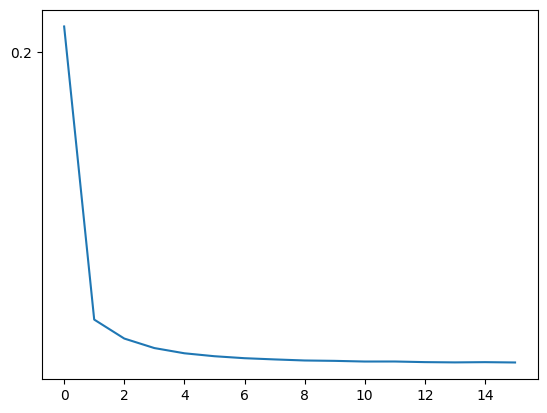

In [ ]:
%matplotlib inline

hidden_size = 128
batch_size = 32

# 훈련 및 테스트 데이터 로더를 가져옵니다.
train_input_lang, train_output_lang, train_dataloader = get_dataloader(train_df, batch_size) # train_df 사용
test_input_lang, test_output_lang, test_dataloader = get_dataloader(test_df, batch_size) # test_df 사용

encoder = EncoderRNN(train_input_lang.n_words, hidden_size).to(device) # train_input_lang 사용
decoder = AttnDecoderRNN(hidden_size, train_output_lang.n_words).to(device) # train_output_lang 사용

# 훈련 데이터 로더를 사용하여 모델 훈련
train(train_dataloader, encoder, decoder, 80, print_every=5, plot_every=5)

In [ ]:
encoder.eval()
decoder.eval()
evaluateRandomly(encoder, decoder)

> 召 對
= 소대 하였다
< 행주 017 하였다 인정전 <EOS>

> 御 夕 講
= 석 강 에 나아갔다
< 주강 에 나아갔다 우박 <EOS>

> 庚 寅 氷
= 얼음 이 얼었다
< 가 큰 청나라 <EOS>

> 壬 寅 視 事
= 정사 를 보았다
< 머물렀다 나아갔다 삼전 <EOS>

> 己 巳 召 對
= 소대 하였다
< 321 잠시 광주 <EOS>

> 有 政
= 정사 가 있었다
< 불었다 돌아갔다 <EOS>

> 別 講
= 별 강하였다
< 청 나아갔다 우박 <EOS>

> 夕 講
= 석 강하였다
< 행주 하였다 박천군 <EOS>

> 御 夕 講
= 석 강 에 나아갔다
< 주강 에 나아갔다 우박 <EOS>

> 召 對
= 소대 를 행 하였다
< 행주 017 하였다 인정전 <EOS>



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

input = 丙 子 日 有 重 暈
output = 불었다 큰 월식 돌아갔다 <EOS>


<ipython-input-47-90c5e6256444>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + input_sentence.split(' ') +
<ipython-input-47-90c5e6256444>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output_words)


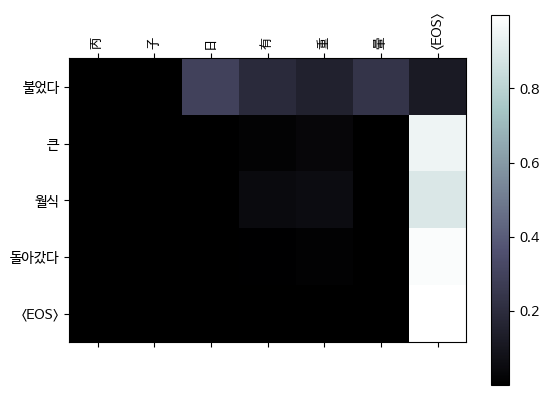

In [ ]:
%matplotlib inline

def showAttention(input_sentence, output_words, attentions):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions.cpu().numpy(), cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') +
                       ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def evaluateAndShowAttention(input_sentence):
    output_words, attentions = evaluate(encoder, decoder, input_sentence, input_lang, output_lang)
    print('input =', input_sentence)
    print('output =', ' '.join(output_words))
    showAttention(input_sentence, output_words, attentions[0, :len(output_words), :])


evaluateAndShowAttention(test_df.iloc[6,0])

비지도학습

In [ ]:
import os
import pandas as pd

# 경로 설정
path = '/content/drive/MyDrive/hanja_korean_dataset/token'

# 폴더 내 모든 parquet 파일 불러오기
parquet_files = [file for file in os.listdir(path) if file.endswith('.parquet')]

# 데이터프레임 리스트 초기화
dfs = []

# 각 parquet 파일을 데이터프레임으로 읽어서 리스트에 추가
for file in parquet_files:
    file_path = os.path.join(path, file)
    df = pd.read_parquet(file_path)
    dfs.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

In [ ]:
df = merged_df
print(df)

                                                     hanja  \
0        [兵, 批, 參, 議, 崔, 尙, 儒, 進, 以, 韓, 啓, 宇, 爲, 盆, 山, ...   
1        [吏, 曹, 啓, 目, 前, 五, 衛, 將, 朴, 枝, 藩, 名, 字, 改, 以, ...   
2                           [上, 在, 景, 福, 宮, 停, 常, 參, 經, 筵]   
3        [奎, 章, 閣, 啓, 曰, 檢, 書, 官, 李, 冕, 翼, 有, 身, 病, 勢, ...   
4        [禮, 曹, 啓, 曰, 郊, 壇, 四, 孟, 朔, 遣, 禮, 郞, 看, 審, 有, ...   
...                                                    ...   
1022157  [義, 禁, 府, 啓, 曰, 戊, 子, 十, 一, 月, 二, 十, 二, 日, 前, ...   
1022158                     [上, 在, 昌, 德, 宮, 停, 常, 參, 經, 筵]   
1022159   [申, 時, 太, 白, 見, 於, 未, 地, 夜, 一, 更, 至, 四, 更, 月, 暈]   
1022160  [大, 司, 憲, 金, 南, 重, 執, 義, 柳, 慶, 昌, 掌, 令, 申, 悅, ...   
1022161  [政, 院, 啓, 曰, 勅, 使, 接, 見, 時, 酬, 酢, 說, 話, 依, 前, ...   

                                                    korean  
0        [병비, 에, 참의, 최상, 유, 는, 나왔다, 한계, 우, 를, 분산, 별장, 으...  
1        [이조, 계목, 에전, 오, 위장, 박지, 번, 이, 이름, 을, 형진, 으로, 출...  
2                 [상이, 경복궁, 에, 있었다, 상, 참과, 경연, 을, 정지, 하였다]  
3        [규

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

print("토큰화된 데이터를 문자열로 변환 중...")
# 리스트 형태의 토큰을 공백으로 연결하여 하나의 문자열로 변환
df['processed_text'] = df['korean'].apply(lambda x: ' '.join(x))

# TF-IDF 벡터라이저 초기화
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=0.95, stop_words=None)

# TF-IDF 행렬 생성
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

print(f"TF-IDF 행렬의 크기: {tfidf_matrix.shape}")

토큰화된 데이터를 문자열로 변환 중...
TF-IDF 행렬의 크기: (1022162, 346378)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np

# 샘플링할 문서 수
sample_size = 10000

# TF-IDF 행렬에서 샘플 추출
sample_indices = np.random.choice(tfidf_matrix.shape[0], sample_size, replace=False)
sample_matrix = tfidf_matrix[sample_indices]

In [ ]:
# 샘플 문서 간 유사도 계산
sample_similarity_matrix = cosine_similarity(sample_matrix)

# 상위 5개 문서 간의 유사도 (예: 첫 5문서 간 유사도)
print(sample_similarity_matrix[:5, :5])

[[1.         0.04872314 0.04497555 0.01289764 0.00922311]
 [0.04872314 1.         0.11641303 0.0448963  0.00913705]
 [0.04497555 0.11641303 1.         0.01179451 0.00843426]
 [0.01289764 0.0448963  0.01179451 1.         0.00747182]
 [0.00922311 0.00913705 0.00843426 0.00747182 1.        ]]


In [ ]:
# K-means 클러스터링
num_clusters = 5  # 군집의 수를 설정합니다.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(sample_matrix)

# 각 문서의 군집 레이블
cluster_labels = kmeans.labels_

# 군집 중심 (각 군집의 중심 벡터)
cluster_centers = kmeans.cluster_centers_

print("Cluster labels for the first 10 documents:", cluster_labels[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels for the first 10 documents: [3 3 3 1 2 4 3 4 4 4]


In [ ]:
# 주요 단어 추출 함수 정의
def get_top_words_for_cluster(tfidf_matrix, cluster_labels, kmeans_model, feature_names, num_words=10):
    top_words = []
    for i in range(len(set(cluster_labels))):
        cluster_center = kmeans_model.cluster_centers_[i]
        top_indices = cluster_center.argsort()[-num_words:][::-1]
        top_words.append([feature_names[j] for j in top_indices])
    return top_words

# TF-IDF 벡터라이저에서 feature_names 추출
feature_names = tfidf_vectorizer.get_feature_names_out()

# 주요 단어 추출
top_words_per_cluster = get_top_words_for_cluster(sample_matrix, cluster_labels, kmeans, feature_names)
print("Top words per cluster:", top_words_per_cluster)

Top words per cluster: [['전망', '단자', '들이니', '들이라', '낙점', '하였다', '할지', '전교', '승지', '차하'], ['소대', '전지', '나오지', '추고만', '파직', '관련', '패초', '대한', '않은', '하였다'], ['있었다', '참과', '상이', '정지', '경연', '창덕궁', '창경궁', '하였다', '경복궁', '경덕궁'], ['하니', '전교', '아뢰', '기를', '알았다고', '하였다', '한다고', '패초', '어떻겠습니까', '윤허'], ['으로', '하였다', '하여', '하기를', '하고', '에서', '하는', '에게', '하지', '전교']]
